In [ ]:
! pip3 install rdkit

import numpy as np
import rdkit
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [ ]:
from google.colab import files
data=files.upload()

MessageError: RangeError: Maximum call stack size exceeded.

In [ ]:
df = pd.read_csv('chembl.csv',sep=';',on_bad_lines='skip')

In [ ]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL253309,NaN,NaN,563.79,1.0,3.30,"3, cyclo(-L-Am7(S2Py)-Aib-L-Leu-D-Pro-)",CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1140755,1,Scientific Literature,Bioorg Med Chem,2008,NaN,NaN,NaN,NaN
1,CHEMBL269935,NaN,NaN,289.33,0.0,4.31,2,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
2,CHEMBL437029,NaN,NaN,521.62,2.0,5.43,56,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
3,CHEMBL3639926,NaN,NaN,411.55,0.0,4.88,BDBM110013,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN
4,CHEMBL3693779,NaN,NaN,496.55,1.0,5.09,BDBM110029,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(6488, 47)

In [ ]:
df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value'],
 

In [ ]:
selected_columns=['Smiles','Standard Value','Standard Type']
filter_df = pd.DataFrame(df,columns=selected_columns)
filter_df.head()

,Smiles,Standard Value,Standard Type
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,230.0,IC50
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,50000.0,IC50
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,50000.0,IC50
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,35.0,IC50
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,13.0,IC50


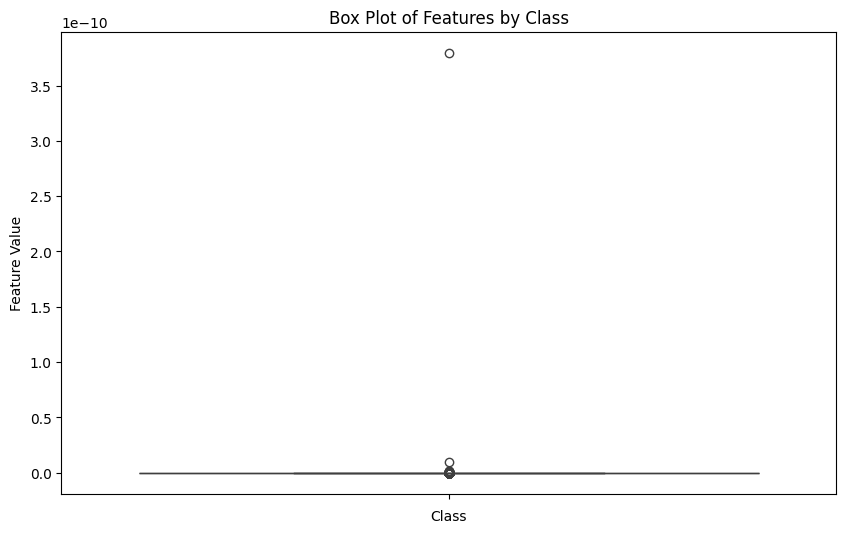

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Standard Value', data=filter_df)
plt.title('Box Plot of Features by Class')
plt.xlabel('Class')
plt.ylabel('Feature Value')
plt.show()

In [ ]:
filter_df['Standard Value'].max()

379700000.0

In [ ]:
filter_df['Standard Value'].min()

0.002

In [ ]:
filter_df['Standard Value']

,Standard Value
0,230.0
1,50000.0
2,50000.0
3,35.0
4,13.0
...,...
6483,33.0
6484,4.7
6485,21800.0
6486,180.0


In [ ]:
import numpy as np



# Convert IC50 values from nanomolar (nM) to molar (M)
filter_df['Standard Value'] = [value * 1e-9 for value in filter_df['Standard Value']]

# Convert IC50 to pIC50
def ic50_to_pic50(ic50):
    return -np.log10(ic50)

# Calculate pIC50 for each value
pic50_values = [ic50_to_pic50(ic50) for ic50 in filter_df['Standard Value']]

# Print the converted pIC50 values
pic50_values

[15.638272163982407,
 13.301029995663981,
 13.301029995663981,
 16.455931955649724,
 16.886056647693163,
 17.69897000433602,
 15.284832642151542,
 15.521433504406156,
 16.42021640338319,
 16.187086643357144,
 15.508638306165727,
 17.0,
 15.217527375833713,
 15.991399828238082,
 15.460923901207224,
 15.088309841246138,
 16.2518119729938,
 13.0,
 13.522878745280337,
 13.0,
 13.542118103266008,
 14.769551078621726,
 16.494850021680094,
 16.638272163982407,
 13.698970004336019,
 13.698970004336019,
 16.72124639904717,
 17.69897000433602,
 16.598599459218455,
 15.856985199745905,
 14.0,
 nan,
 17.522878745280337,
 15.4089353929735,
 16.886056647693163,
 18.356547323513812,
 15.744727494896694,
 15.619788758288394,
 12.167491087293763,
 17.2839966563652,
 13.823908740944319,
 15.924453038607469,
 16.366531544420415,
 15.316052869248487,
 15.4089353929735,
 16.744727494896694,
 14.671620396561263,
 14.721246399047171,
 13.0,
 15.756961951313706,
 15.468521082957745,
 15.709965388637482,
 15.4

In [ ]:

def norm_value(input):
    norm=[]
    for i in input['StandardValue']:
      if i>100000000:
         i=100000000
         norm.append(i)
      input['standard_value_norm']=norm
      x=input.drop(columns=['StandardValue'])
      return(x)
    standard_df=norm_value(filter_df)
    standard_df

In [ ]:
import pandas as pd
import numpy as np

# Original data with IC5

# Convert IC50 values from nanomolar (nM) to molar (M)
df['IC50_M'] = df['Standard Value'] * 1e-9

# Function to convert IC50 to pIC50
def ic50_to_pic50(ic50):
    return -np.log10(ic50)

# Calculate pIC50 and add it as a new column
df['pIC50'] = df['IC50_M'].apply(ic50_to_pic50)

# Drop the intermediate column (IC50 in M) to keep the DataFrame clean, if not needed
df = df.drop(columns=['IC50_M'])

# Print the updated DataFrame
print(df)

     Molecule ChEMBL ID Molecule Name  Molecule Max Phase  Molecular Weight  \
0          CHEMBL253309           NaN                 NaN            563.79   
1          CHEMBL269935           NaN                 NaN            289.33   
2          CHEMBL437029           NaN                 NaN            521.62   
3         CHEMBL3639926           NaN                 NaN            411.55   
4         CHEMBL3693779           NaN                 NaN            496.55   
...                 ...           ...                 ...               ...   
6483           CHEMBL98    VORINOSTAT                 4.0            264.32   
6484      CHEMBL2364628  RICOLINOSTAT                 2.0            433.51   
6485      CHEMBL5186622           NaN                 NaN            407.87   
6486      CHEMBL5182624           NaN                 NaN            600.72   
6487      CHEMBL5206573           NaN                 NaN            541.63   

      #RO5 Violations  AlogP                       

In [ ]:
def categorize_pIC50(pIC50):
  if pIC50 > 7:
    return "Rank I"
  elif pIC50 > 5:
    return "Rank II"
  else:
    return "Rank III"
# Apply the categorization function to the pIC50 column
df["Potency"] = df["pIC50"].apply(categorize_pIC50)

# Print the updated dataframe
print(df)

     Molecule ChEMBL ID Molecule Name  Molecule Max Phase  Molecular Weight  \
0          CHEMBL253309           NaN                 NaN            563.79   
1          CHEMBL269935           NaN                 NaN            289.33   
2          CHEMBL437029           NaN                 NaN            521.62   
3         CHEMBL3639926           NaN                 NaN            411.55   
4         CHEMBL3693779           NaN                 NaN            496.55   
...                 ...           ...                 ...               ...   
6483           CHEMBL98    VORINOSTAT                 4.0            264.32   
6484      CHEMBL2364628  RICOLINOSTAT                 2.0            433.51   
6485      CHEMBL5186622           NaN                 NaN            407.87   
6486      CHEMBL5182624           NaN                 NaN            600.72   
6487      CHEMBL5206573           NaN                 NaN            541.63   

      #RO5 Violations  AlogP                       

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

In [ ]:

final_df = pd.concat([filter_df, df], axis=1)
final_df.head()

,Smiles,Standard Value,Standard Type,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,...,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,pIC50,Potency
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,2.300000e-16,IC50,CHEMBL253309,NaN,NaN,563.79,1.0,3.30,"3, cyclo(-L-Am7(S2Py)-Aib-L-Leu-D-Pro-)",...,1,Scientific Literature,Bioorg Med Chem,2008,NaN,NaN,NaN,NaN,6.638272,Rank II
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,5.000000e-14,IC50,CHEMBL269935,NaN,NaN,289.33,0.0,4.31,2,...,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN,4.301030,Rank III
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,5.000000e-14,IC50,CHEMBL437029,NaN,NaN,521.62,2.0,5.43,56,...,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN,4.301030,Rank III
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,3.500000e-17,IC50,CHEMBL3639926,NaN,NaN,411.55,0.0,4.88,BDBM110013,...,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN,7.455932,Rank I
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,1.300000e-17,IC50,CHEMBL3693779,NaN,NaN,496.55,1.0,5.09,BDBM110029,...,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN,7.886057,Rank I


In [ ]:
extracted_df = final_df[['Smiles','Potency']]

# Print the extracted DataFrame
print(extracted_df)

                                                 Smiles  \
0     CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...   
1                    O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1   
2     C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...   
3     Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...   
4     COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...   
...                                                 ...   
6483                        O=C(CCCCCCC(=O)Nc1ccccc1)NO   
6484   O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO   
6485      CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1   
6486  Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...   
6487  COc1cc(C(=O)c2csc(-c3ccc(C#CCCC(=O)Nc4ccccc4N)...   

                                                 Smiles   Potency  
0     CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...   Rank II  
1                    O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1  Rank III  
2     C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...  Rank III  
3     Cc1cc(C)c(Nc2

In [ ]:
descriptor_names = [desc_name[0] for desc_name in Descriptors._descList] #208, list exists in rdkit, wol wt

calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

def calculate_descriptors(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles) # converting smiles to "molecular object"
        if mol is not None:
            return calculator.CalcDescriptors(mol)
        else:
            return [None] * len(descriptor_names)
    except:
        return [None] * len(descriptor_names)

descriptors = filter_df['Smiles'].apply(calculate_descriptors) # applying the function to generate descriptors on the SMILES column in our original dataframe
desc = pd.DataFrame(descriptors.tolist(), columns=descriptor_names) # Adding these descriptors to a new data frame, whose column heading is the descriptor name
results_df = pd.concat([final_df, desc], axis=1) # make a final data frame by joing original df and df of chemical desciptors

Streaming output truncated to the last 5000 lines.
[05:37:27] DEPRECATION WARNING: please use MorganGenerator
[05:37:27] DEPRECATION WARNING: please use MorganGenerator
[05:37:27] DEPRECATION WARNING: please use MorganGenerator
[05:37:27] DEPRECATION WARNING: please use MorganGenerator
[05:37:27] DEPRECATION WARNING: please use MorganGenerator
[05:37:27] DEPRECATION WARNING: please use MorganGenerator
[05:37:27] DEPRECATION WARNING: please use MorganGenerator
[05:37:27] DEPRECATION WARNING: please use MorganGenerator
[05:37:27] DEPRECATION WARNING: please use MorganGenerator
[05:37:27] DEPRECATION WARNING: please use MorganGenerator
[05:37:27] DEPRECATION WARNING: please use MorganGenerator
[05:37:27] DEPRECATION WARNING: please use MorganGenerator
[05:37:27] DEPRECATION WARNING: please use MorganGenerator
[05:37:27] DEPRECATION WARNING: please use MorganGenerator
[05:37:27] DEPRECATION WARNING: please use MorganGenerator
[05:37:27] DEPRECATION WARNING: please use MorganGenerator
[05:3

In [ ]:
results_df

,Smiles,Standard Value,Standard Type,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,2.300000e-16,IC50,CHEMBL253309,NaN,NaN,563.79,1.0,3.30,"3, cyclo(-L-Am7(S2Py)-Aib-L-Leu-D-Pro-)",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,5.000000e-14,IC50,CHEMBL269935,NaN,NaN,289.33,0.0,4.31,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,5.000000e-14,IC50,CHEMBL437029,NaN,NaN,521.62,2.0,5.43,56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,3.500000e-17,IC50,CHEMBL3639926,NaN,NaN,411.55,0.0,4.88,BDBM110013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,1.300000e-17,IC50,CHEMBL3693779,NaN,NaN,496.55,1.0,5.09,BDBM110029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6483,O=C(CCCCCCC(=O)Nc1ccccc1)NO,3.300000e-17,IC50,CHEMBL98,VORINOSTAT,4.0,264.32,0.0,2.47,SAHA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
6484,O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO,4.700000e-18,IC50,CHEMBL2364628,RICOLINOSTAT,2.0,433.51,0.0,4.13,ACY-1215,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
6485,CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,2.180000e-14,IC50,CHEMBL5186622,NaN,NaN,407.87,0.0,3.40,9a,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6486,Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...,1.800000e-16,IC50,CHEMBL5182624,NaN,NaN,600.72,2.0,5.30,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [ ]:
c=0
check=extracted_df['Potency']
for ele in check:
  if ele=='Rank III': c+=1

print(c)

884


In [ ]:
from sklearn.preprocessing import RobustScaler # robust to outliers
df_robust = results_df.copy()

# numeric columns excluding 'solubility' which is our target column for prediction by model
numeric_columns = df_robust.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col != 'Potency'] # dont scale y!

scaler = RobustScaler()

# scale selected numeric columns
df_robust[numeric_columns] = scaler.fit_transform(df_robust[numeric_columns])

df_robust.head()


ValueError: Input X contains infinity or a value too large for dtype('float64').